In [ ]:
# importing required libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
NB15_1 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_1.csv")
NB15_2 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_2.csv")
NB15_3 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_3.csv")
NB15_4 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_4.csv")
NB15_features = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\NUSW-NB15_features.csv", encoding='cp1252')

C:\Users\arind\AppData\Local\Temp\ipykernel_10308\3674474285.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_1.csv")
C:\Users\arind\AppData\Local\Temp\ipykernel_10308\3674474285.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2 = pd.read_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\raw\UNSW-NB15_2.csv")


In [3]:
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0


In [4]:
print("dataset shape: ",train_df.shape)

dataset shape:  (2540043, 49)


In [5]:
train_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   srcip             2540043 non-null  object 
 1   sport             2540043 non-null  object 
 2   dstip             2540043 non-null  object 
 3   dsport            2540043 non-null  object 
 4   proto             2540043 non-null  object 
 5   state             2540043 non-null  object 
 6   dur               2540043 non-null  float64
 7   sbytes            2540043 non-null  int64  
 8   dbytes            2540043 non-null  int64  
 9   sttl              2540043 non-null  int64  
 10  dttl              2540043 non-null  int64  
 11  sloss             2540043 non-null  int64  
 12  dloss             2540043 non-null  int64  
 13  service           2540043 non-null  object 
 14  Sload             2540043 non-null  float64
 15  Dload             2540043 non-null  float64
 16  

In [6]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [7]:
for col in train_df.columns:
    print(f"Unique values in '{col}': {train_df[col].unique()}")

Unique values in 'srcip': ['175.45.176.3' '59.166.0.8' '59.166.0.0' '175.45.176.1' '59.166.0.5'
 '59.166.0.7' '175.45.176.0' '149.171.126.14' '59.166.0.1' '59.166.0.9'
 '149.171.126.15' '149.171.126.18' '59.166.0.4' '59.166.0.2' '59.166.0.3'
 '59.166.0.6' '175.45.176.2' '149.171.126.10' '10.40.182.1'
 '149.171.126.12' '10.40.170.2' '10.40.85.30' '149.171.126.2'
 '10.40.182.3' '10.40.85.1' '10.40.182.6' '10.40.85.10' '149.171.126.7'
 '149.171.126.6' '149.171.126.0' '149.171.126.8' '149.171.126.13'
 '149.171.126.5' '192.168.241.243' '149.171.126.4' '149.171.126.9'
 '149.171.126.1' '149.171.126.3' '149.171.126.11' '149.171.126.19'
 '149.171.126.17' '149.171.126.16' '127.0.0.1']
Unique values in 'sport': [57672 38052 42911 ... '17953' '20349' '53235']
Unique values in 'dstip': ['149.171.126.15' '149.171.126.9' '149.171.126.2' '149.171.126.14'
 '149.171.126.6' '149.171.126.0' '149.171.126.17' '175.45.176.1'
 '149.171.126.12' '149.171.126.8' '149.171.126.1' '175.45.176.3'
 '149.171.126.4' '1

In [8]:
train_df.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,...,1.191900e+06,1.110166e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06
mean,6.587925e-01,4.339589e+03,3.642760e+04,6.278202e+01,3.076681e+01,5.163917e+00,1.632944e+01,3.695650e+07,2.450860e+06,3.328882e+01,...,2.345860e-01,3.969947e-02,9.206993e+00,8.988962e+00,6.439107e+00,6.900989e+00,4.642145e+00,3.592733e+00,6.845894e+00,1.264872e-01
std,1.392494e+01,5.640604e+04,1.610962e+05,7.462281e+01,4.285092e+01,2.251709e+01,5.659479e+01,1.186044e+08,4.224865e+06,7.628393e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082250e+01,8.162039e+00,8.205068e+00,8.477584e+00,6.174449e+00,1.125829e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353955e+05,1.191580e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145650e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925945e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [9]:
train_df['service'].unique()

array(['-', 'dns', 'ftp-data', 'smtp', 'http', 'ssh', 'pop3', 'ftp',
       'ssl', 'dhcp', 'snmp', 'irc', 'radius'], dtype=object)

In [10]:
train_df['service'].replace('-',np.nan,inplace=True)

C:\Users\arind\AppData\Local\Temp\ipykernel_16576\3227912851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['service'].replace('-',np.nan,inplace=True)


In [11]:
#print only null columns
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Name
service             1246395
ct_flw_http_mthd    1348143
is_ftp_login        1429877
attack_cat          2218760
dtype: int64

Working with **attack_cat** column

In [12]:
# Replace nan value with normal
train_df['attack_cat'] = train_df['attack_cat'].replace(np.nan, "Normal")

In [13]:
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

In [14]:
train_df['attack_cat'].unique()

array(['normal', 'generic', 'exploits', 'reconnaissance', 'fuzzers',
       'dos', 'analysis', 'backdoor', 'backdoors', 'worms', 'shellcode'],
      dtype=object)

In [15]:
train_df['attack_cat'] = train_df['attack_cat'].replace(np.nan, "Normal")

In [16]:
train_df['attack_cat'].unique()

array(['normal', 'generic', 'exploits', 'reconnaissance', 'fuzzers',
       'dos', 'analysis', 'backdoor', 'backdoors', 'worms', 'shellcode'],
      dtype=object)

In [17]:
train_df['attack_cat'].value_counts()

attack_cat
normal            2218760
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: count, dtype: int64

In [18]:
train_df['attack_cat'] = train_df['attack_cat'].replace({'backdoors': 'backdoor'})

In [19]:
attack_cat_encoder = LabelEncoder()

# Fit and transform proto column
train_df["attack_cat_encoded"] = attack_cat_encoder.fit_transform(train_df["attack_cat"])

# Print mapping (protocol name → numeric code)
proto_mapping = dict(zip(attack_cat_encoder.classes_, attack_cat_encoder.transform(attack_cat_encoder.classes_)))
for k, v in proto_mapping.items():
    print(f"{k} → {v}")

analysis → 0
backdoor → 1
dos → 2
exploits → 3
fuzzers → 4
generic → 5
normal → 6
reconnaissance → 7
shellcode → 8
worms → 9


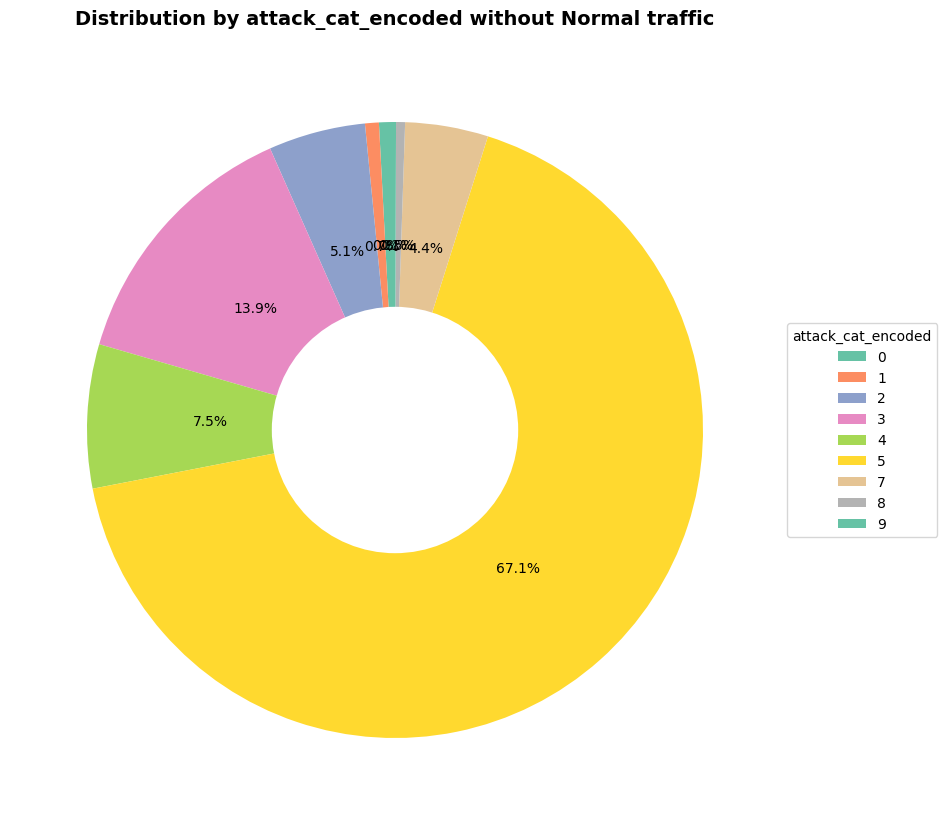

In [20]:
def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 10))
    value_counts = df[col].value_counts().sort_index()
    colors = sns.color_palette('Set2', len(value_counts))
    # Create pie chart
    pie_result = plt.pie(
        value_counts.values, 
        labels=None, 
        autopct="%.1f%%", 
        startangle=90, 
        colors=colors
    )
    if len(pie_result) == 3:
        wedges, texts, autotexts = pie_result
    else:
        wedges, texts = pie_result
        autotexts = []

    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.legend(
        wedges, 
        value_counts.index, 
        title=col, 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    plt.title(f"Distribution by {col} without Normal traffic", fontweight="black", size=14, pad=15)
    plt.show()

# Filter out rows where attack_cat_encoded == 5 (Normal)
filtered_df = train_df[train_df['attack_cat_encoded'] != 6]
pie_bar_plot(filtered_df, 'attack_cat_encoded')


Class distribution (attack only, without normal) in Training Data:
attack_cat_encoded
5    215481
3     44525
4     24246
2     16353
7     13987
0      2677
1      2329
8      1511
9       174
Name: count, dtype: int64


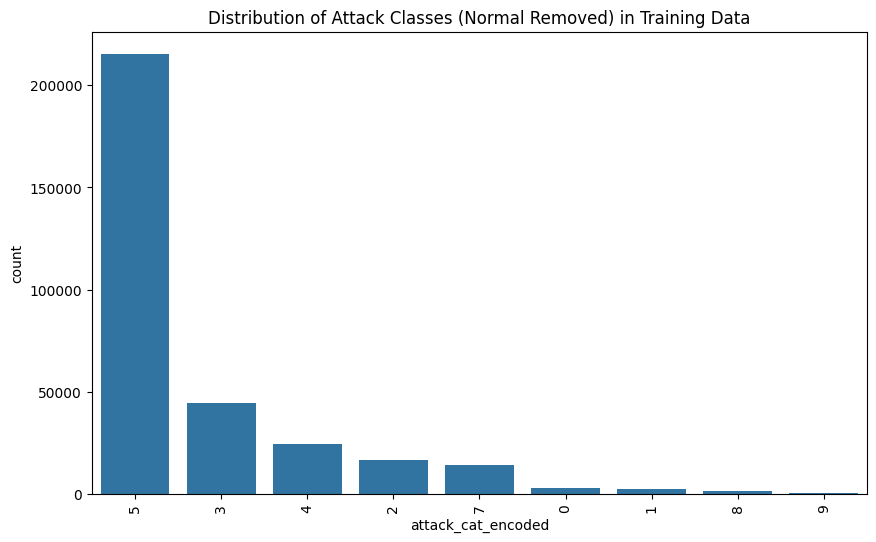

In [21]:
print("Class distribution (attack only, without normal) in Training Data:")
# Filter out Normal (encoded as 5)
filtered_df = train_df[train_df['attack_cat_encoded'] != 6]

# Print distribution
print(filtered_df['attack_cat_encoded'].value_counts())

# Plot the distribution of classes (excluding normal)
plt.figure(figsize=(10, 6))
sns.countplot(
    data=filtered_df, 
    x='attack_cat_encoded', 
    order=filtered_df['attack_cat_encoded'].value_counts().index
)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes (Normal Removed) in Training Data')
plt.show()

Droping duplicate values

In [22]:
#check for duplicate rows
train_df.duplicated().sum()

np.int64(480626)

In [23]:
#drop duplicate rows
train_df.drop_duplicates(inplace=True)
print("dataset shape after dropping duplicate values: ",train_df.shape)

dataset shape after dropping duplicate values:  (2059417, 50)


Working with **service** column

In [24]:
#First encoding the categorical features
service_encoder = LabelEncoder()
train_df['service'] = service_encoder.fit_transform(train_df['service'].astype(str)) 
# Use KNN imputation for fill missing values in service column
imputer = KNNImputer(n_neighbors=5)
train_df['service'] = imputer.fit_transform(train_df[['service']])

Working with **ct_flw_http_mthd** column

In [25]:
train_df['ct_flw_http_mthd'].unique()

array([nan,  0.,  1.,  6.,  4.,  3.,  5., 14., 16.,  9.,  2., 10.,  8.,
       30., 36., 12., 25.])

In [26]:
# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

C:\Users\arind\AppData\Local\Temp\ipykernel_16576\2533938766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['ct_flw_http_mthd'].fillna(0, inplace=True)


Working with **is_ftp_login** column

In [27]:
train_df["is_ftp_login"].unique()

array([nan,  0.,  1.,  4.,  2.])

In [28]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df
column = 'is_ftp_login'
convert_to_binary(train_df, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,attack_cat_encoded
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,10,8,4,5,3,1,7,normal,0,6
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,14,6,8,12,5,1,6,normal,0,6
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,9,16,7,6,1,1,3,normal,0,6
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,33,33,17,17,17,17,33,generic,1,5
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,2,2,5,4,1,1,1,normal,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,0.031870,7820,15060,31,...,5,6,1,4,1,1,1,normal,0,6
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,0.035147,528,304,31,...,11,4,3,7,1,1,1,normal,0,6
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,...,3,10,4,1,1,1,1,normal,0,6
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,...,1,1,2,6,1,1,1,normal,0,6


In [29]:
# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

C:\Users\arind\AppData\Local\Temp\ipykernel_16576\313227357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['is_ftp_login'].fillna(0, inplace=True)


In [30]:
train_df["is_ftp_login"].unique()

array([0, 1])

Checking again for null values

In [31]:
#we have cleaned all missing values
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [32]:
# statistics for object-type columns
train_df.describe(include="O")

Name,srcip,sport,dstip,dsport,proto,state,ct_ftp_cmd,attack_cat
count,2059417,2059417,2059417,2059417,2059417,2059417,2059417,2059417
unique,43,100343,47,128297,135,16,13,10
top,59.166.0.4,0,149.171.126.3,53,tcp,FIN,,normal
freq,192686,20653,192515,233820,1448858,1433507,1014165,1959771


Working with **ct_ftp_cmd** column

In [33]:
train_df["ct_ftp_cmd"].unique()

array([' ', 0, 1, '1', 2, '0', '4', 5, 3, 4, 6, 8, '2'], dtype=object)

In [34]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')

In [35]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')
train_df["ct_ftp_cmd"].unique()

array([0, 1, 2, 4, 5, 3, 6, 8])

Working with **sport** column

In [36]:
len(train_df['sport'].unique())

100343

In [37]:
train_df["sport"].dtype # It is object type

dtype('O')

In [38]:
# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)
# The parameter errors='coerce' means: If a value cannot be converted to a number, replace it with NaN instead of raising an error.

In [39]:
train_df["sport"].dtype

dtype('int64')

Working with **dsport** column

In [40]:
len(train_df['dsport'].unique())

128297

In [41]:
train_df['dsport'] = train_df['dsport'].astype('str')

In [42]:
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

Some research on **dsport** column

C:\Users\arind\AppData\Local\Temp\ipykernel_16576\780498379.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dports.index.astype(str), y=top_dports.values, palette="viridis")


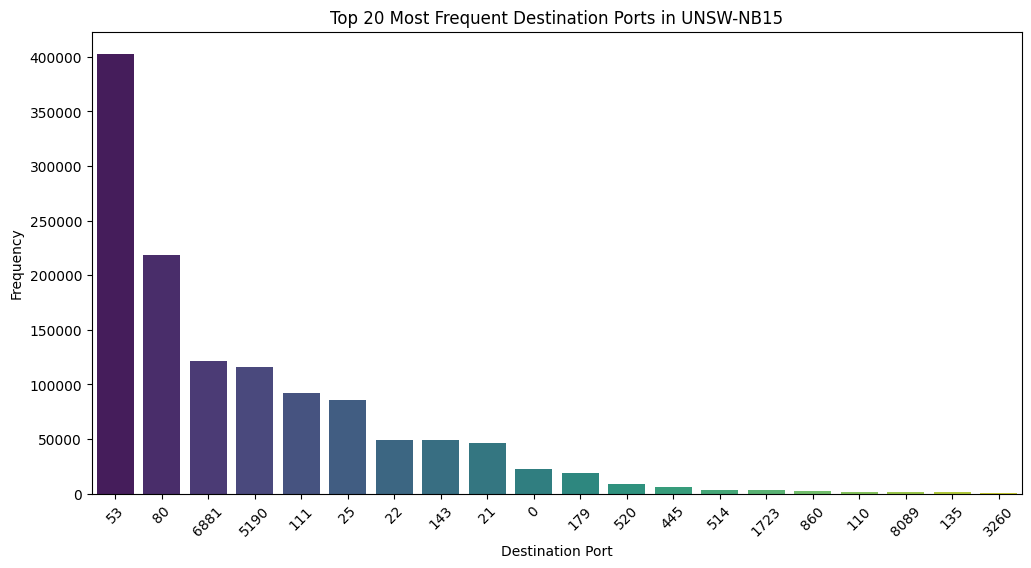

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 20 most frequent destination ports
top_dports = train_df['dsport'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_dports.index.astype(str), y=top_dports.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Destination Port")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Destination Ports in UNSW-NB15")
plt.show()

In [44]:
# Dictionary for well-known ports mapping
port_services = {
    20: "FTP-Data",
    21: "FTP",
    22: "SSH",
    23: "Telnet",
    25: "SMTP",
    53: "DNS",
    67: "DHCP-Server",
    68: "DHCP-Client",
    69: "TFTP",
    80: "HTTP",
    110: "POP3",
    119: "NNTP",
    123: "NTP",
    135: "MS-RPC",
    137: "NetBIOS-NS",
    138: "NetBIOS-DGM",
    139: "NetBIOS-SSN",
    143: "IMAP",
    161: "SNMP",
    162: "SNMP-Trap",
    179: "BGP",
    389: "LDAP",
    443: "HTTPS",
    465: "SMTPS",
    514: "Syslog",
    587: "SMTP-Submission",
    636: "LDAPS",
    873: "Rsync",
    993: "IMAPS",
    995: "POP3S",
    1433: "MSSQL",
    1521: "Oracle DB",
    2049: "NFS",
    2082: "cPanel",
    2083: "cPanel-SSL",
    2181: "Zookeeper",
    3306: "MySQL",
    3389: "RDP",
    5432: "PostgreSQL",
    5900: "VNC",
    6379: "Redis",
    8080: "HTTP-Proxy",
    8443: "HTTPS-Alt",
    9200: "Elasticsearch",
    11211: "Memcached"
}

# Function to categorize ports
def categorize_port(port):
    if port in port_services:
        return port_services[port]  # specific known service
    elif 0 <= port <= 1023:
        return "Well-known-other"
    elif 1024 <= port <= 49151:
        return "Registered"
    elif 49152 <= port <= 65535:
        return "Dynamic"
    else:
        return "Unknown"

# Apply to dataframe
train_df["Destination_Port_Category"] = train_df["dsport"].apply(categorize_port)
train_df["Destination_Port_Category"].unique()

array(['Registered', 'DNS', 'Dynamic', 'SMTP', 'HTTP', 'Well-known-other',
       'IMAP', 'SSH', 'POP3', 'MSSQL', 'BGP', 'FTP', 'Syslog',
       'NetBIOS-DGM', 'PostgreSQL', 'HTTPS', 'MySQL', 'MS-RPC', 'TFTP',
       'Oracle DB', 'LDAP', 'HTTP-Proxy', 'NetBIOS-NS', 'Telnet', 'NTP',
       'DHCP-Server', 'NetBIOS-SSN', 'SNMP', 'SNMP-Trap', 'NNTP',
       'Memcached', 'Zookeeper', 'Elasticsearch', 'RDP', 'NFS', 'VNC',
       'Redis', 'HTTPS-Alt', 'DHCP-Client', 'cPanel', 'SMTPS',
       'cPanel-SSL', 'IMAPS'], dtype=object)

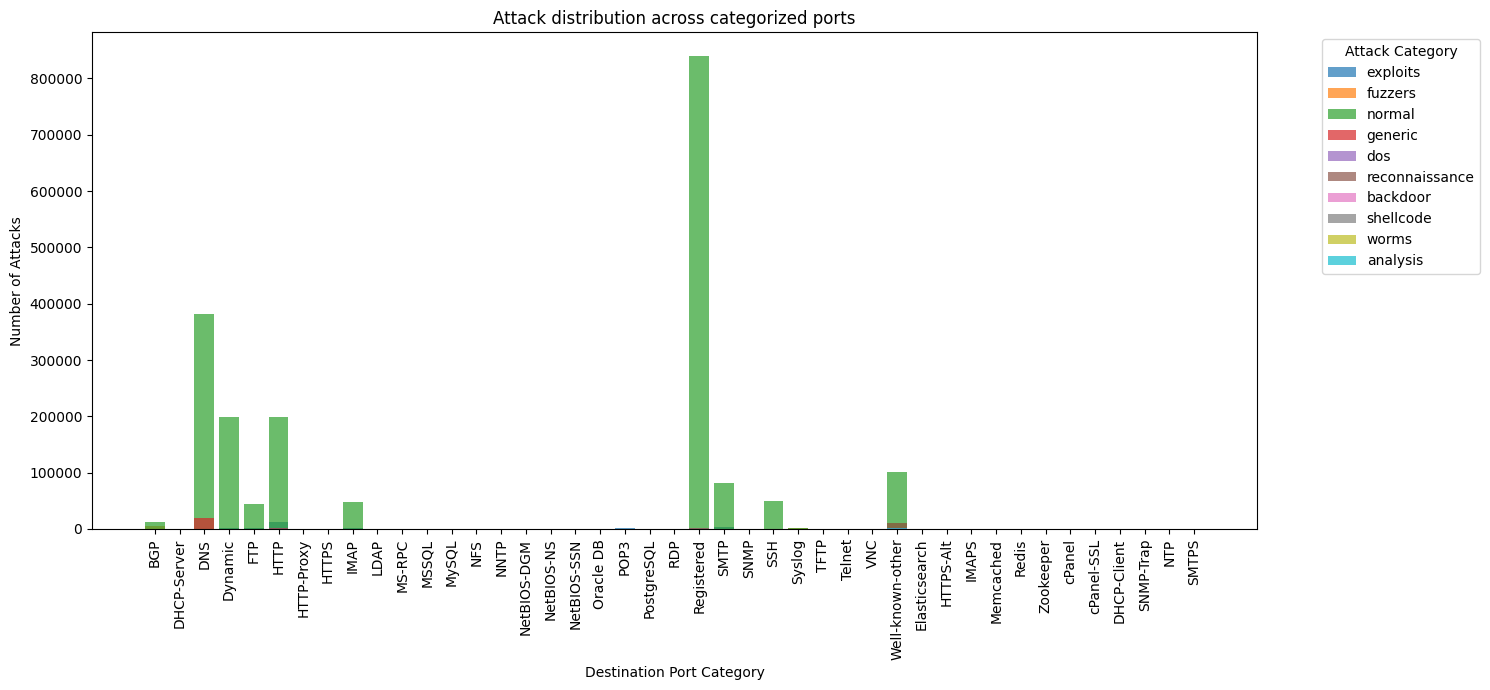

In [45]:
# Group and count
attack_distribution = train_df.groupby(["Destination_Port_Category", "attack_cat"]).size().reset_index(name="count")

# Plot
plt.figure(figsize=(15,7))
for attack in attack_distribution["attack_cat"].unique():
    subset = attack_distribution[attack_distribution["attack_cat"] == attack]
    plt.bar(subset["Destination_Port_Category"], subset["count"], label=attack, alpha=0.7)

plt.xticks(rotation=90)
plt.xlabel("Destination Port Category")
plt.ylabel("Number of Attacks")
plt.title("Attack distribution across categorized ports")
plt.legend(title="Attack Category", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

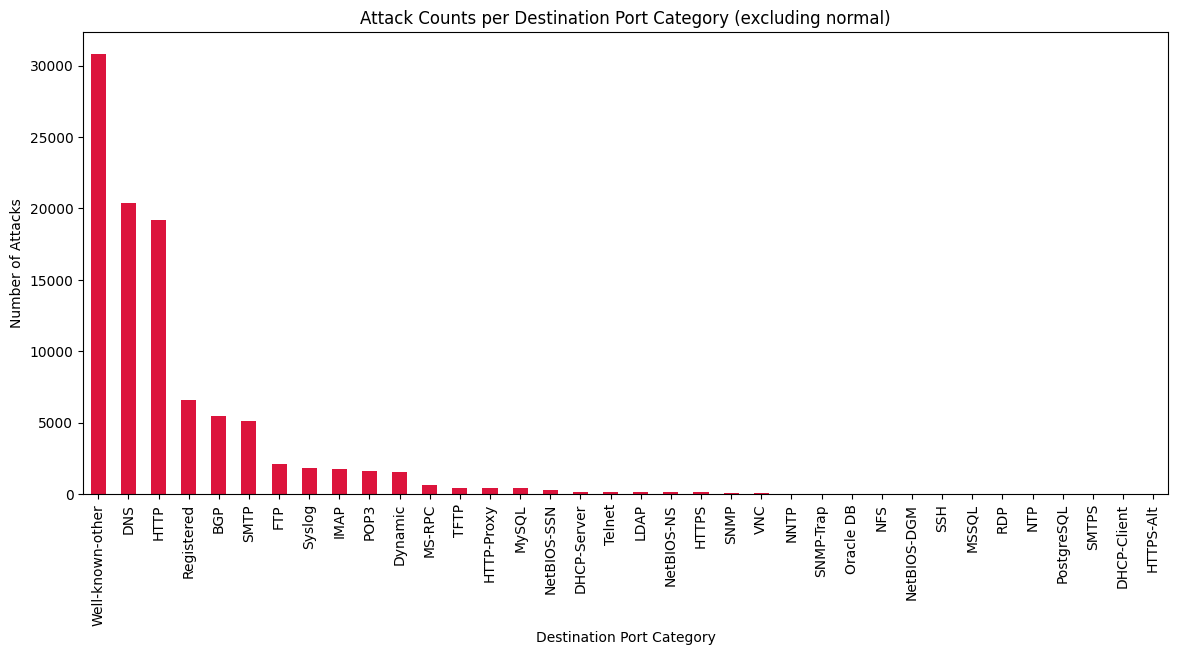

In [46]:
import matplotlib.pyplot as plt

# Exclude normal traffic
attack_df = train_df[train_df["attack_cat"] != "normal"]

# Group by Destination_Port_Category and count attacks
attack_counts = (
    attack_df.groupby("Destination_Port_Category")
    .size()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(14,6))
attack_counts.plot(kind="bar", color="crimson")
plt.title("Attack Counts per Destination Port Category (excluding normal)")
plt.xlabel("Destination Port Category")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=90)
plt.show()

In [47]:
le = LabelEncoder()

# Fit and transform
train_df["Destination_Port_Category"] = le.fit_transform(train_df["Destination_Port_Category"])

for cat, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{cat} → {code}")

BGP → 0
DHCP-Client → 1
DHCP-Server → 2
DNS → 3
Dynamic → 4
Elasticsearch → 5
FTP → 6
HTTP → 7
HTTP-Proxy → 8
HTTPS → 9
HTTPS-Alt → 10
IMAP → 11
IMAPS → 12
LDAP → 13
MS-RPC → 14
MSSQL → 15
Memcached → 16
MySQL → 17
NFS → 18
NNTP → 19
NTP → 20
NetBIOS-DGM → 21
NetBIOS-NS → 22
NetBIOS-SSN → 23
Oracle DB → 24
POP3 → 25
PostgreSQL → 26
RDP → 27
Redis → 28
Registered → 29
SMTP → 30
SMTPS → 31
SNMP → 32
SNMP-Trap → 33
SSH → 34
Syslog → 35
TFTP → 36
Telnet → 37
VNC → 38
Well-known-other → 39
Zookeeper → 40
cPanel → 41
cPanel-SSL → 42


Working with **proto** column

In [48]:
train_df['proto'].unique()

array(['tcp', 'udp', 'arp', 'ptp', 'unas', 'ip', 'vrrp', 'pnni', '3pc',
       'sun-nd', 'wsn', 'ospf', 'st2', 'kryptolan', 'sctp', 'pvp', 'fc',
       'wb-expak', 'secure-vmtp', 'ipv6-no', 'mhrp', 'xtp', 'hmp',
       'idpr-cmtp', 'merit-inp', 'icmp', 'pim', 'any', 'cbt', 'crudp',
       'ipcv', 'larp', 'sm', 'iatp', 'iso-ip', 'rsvp', 'ddx', 'chaos',
       'tp++', 'mobile', 'cftp', 'ttp', 'sprite-rpc', 'aes-sp3-d', 'aris',
       'sep', 'encap', 'dcn', 'igmp', 'isis', 'leaf-2', 'ipnip', 'argus',
       'compaq-peer', 'vmtp', 'ipv6-route', 'egp', 'uti', 'zero', 'tlsp',
       'wb-mon', 'sdrp', 'swipe', 'tcf', 'iso-tp4', 'narp', 'ippc',
       'vines', 'skip', 'rvd', 'emcon', 'ipv6-opts', 'a/n', 'gre', 'nvp',
       'gmtp', 'ipv6', 'br-sat-mon', 'dgp', 'idrp', 'pri-enc', 'eigrp',
       'pup', 'sat-mon', 'trunk-2', 'xnet', 'ipv6-frag', 'nsfnet-igp',
       'ipx-n-ip', 'leaf-1', 'stp', 'cphb', 'cpnx', 'ipip', 'i-nlsp',
       'micp', 'visa', 'prm', 'sccopmce', 'il', 'igp', 'sat-expak', 

In [49]:
len(train_df['proto'].unique())

135

In [50]:
proto_encoder = LabelEncoder()

# Fit and transform proto column
train_df["proto"] = proto_encoder.fit_transform(train_df["proto"])

# Print mapping (protocol name → numeric code)
proto_mapping = dict(zip(proto_encoder.classes_, proto_encoder.transform(proto_encoder.classes_)))
for k, v in proto_mapping.items():
    print(f"{k} → {v}")

3pc → 0
a/n → 1
aes-sp3-d → 2
any → 3
argus → 4
aris → 5
arp → 6
ax.25 → 7
bbn-rcc → 8
bna → 9
br-sat-mon → 10
cbt → 11
cftp → 12
chaos → 13
compaq-peer → 14
cphb → 15
cpnx → 16
crtp → 17
crudp → 18
dcn → 19
ddp → 20
ddx → 21
dgp → 22
egp → 23
eigrp → 24
emcon → 25
encap → 26
esp → 27
etherip → 28
fc → 29
fire → 30
ggp → 31
gmtp → 32
gre → 33
hmp → 34
i-nlsp → 35
iatp → 36
ib → 37
icmp → 38
idpr → 39
idpr-cmtp → 40
idrp → 41
ifmp → 42
igmp → 43
igp → 44
il → 45
ip → 46
ipcomp → 47
ipcv → 48
ipip → 49
iplt → 50
ipnip → 51
ippc → 52
ipv6 → 53
ipv6-frag → 54
ipv6-no → 55
ipv6-opts → 56
ipv6-route → 57
ipx-n-ip → 58
irtp → 59
isis → 60
iso-ip → 61
iso-tp4 → 62
kryptolan → 63
l2tp → 64
larp → 65
leaf-1 → 66
leaf-2 → 67
merit-inp → 68
mfe-nsp → 69
mhrp → 70
micp → 71
mobile → 72
mtp → 73
mux → 74
narp → 75
netblt → 76
nsfnet-igp → 77
nvp → 78
ospf → 79
pgm → 80
pim → 81
pipe → 82
pnni → 83
pri-enc → 84
prm → 85
ptp → 86
pup → 87
pvp → 88
qnx → 89
rdp → 90
rsvp → 91
rtp → 92
rvd → 93
sat-expa

In [51]:
train_df['proto'].unique()

array([114, 120,   6,  86, 122,  46, 127,  83,   0, 111, 130,  79, 109,
        63,  98,  88,  29, 128, 100,  55,  70, 133,  34,  40,  68,  38,
        81,   3,  11,  18,  48,  65, 103,  36,  61,  91,  21,  13, 116,
        72,  12, 119, 106,   2,   5, 101,  26,  19,  43,  60,  67,  51,
         4,  14, 126,  57,  23, 123, 134, 115, 129,  99, 112, 113,  62,
        75,  52, 124, 102,  93,  25,  56,   1,  33,  78,  32,  53,  10,
        22,  41,  84,  24,  87,  95, 118, 131,  54,  77,  58,  66, 110,
        15,  16,  49,  35,  71, 125,  85,  96,  45,  44,  94,  80,  90,
       108,  50, 117,  31,   7,  76,  47,  17, 104,  69,  74,  64,  59,
         8,  28,  42, 105,  30, 132,  73,  37,  89,  39,   9, 107,  97,
        20,  82,  92,  27, 121])

Working with **state** column

In [52]:
train_df['state'].unique()

array(['CON', 'FIN', 'INT', 'REQ', 'ECR', 'ECO', 'ACC', 'CLO', 'RST',
       'PAR', 'URH', 'MAS', 'URN', 'TXD', 'no', 'TST'], dtype=object)

In [53]:
state_encoder = LabelEncoder()

# Fit and transform proto column
train_df["state"] = state_encoder.fit_transform(train_df["state"])

# Print mapping (protocol name → numeric code)
proto_mapping = dict(zip(state_encoder.classes_, state_encoder.transform(state_encoder.classes_)))
for k, v in proto_mapping.items():
    print(f"{k} → {v}")

ACC → 0
CLO → 1
CON → 2
ECO → 3
ECR → 4
FIN → 5
INT → 6
MAS → 7
PAR → 8
REQ → 9
RST → 10
TST → 11
TXD → 12
URH → 13
URN → 14
no → 15


Removing **'srcip', 'dstip'** columns because they are IP adresses not an important feature for our prediction

In [54]:
train_df = train_df.drop(['srcip', 'dstip', 'attack_cat'], axis=1)
train_df.columns

Index(['sport', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts',
       'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt',
       'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label', 'attack_cat_encoded',
       'Destination_Port_Category'],
      dtype='object', name='Name')


Service Distribution in Training Data:
service
6.0     1169180
1.0      386755
4.0      203531
3.0      124849
9.0       81132
11.0      46981
2.0       45074
7.0        1490
12.0        142
10.0        113
0.0         102
8.0          37
5.0          31
Name: count, dtype: int64


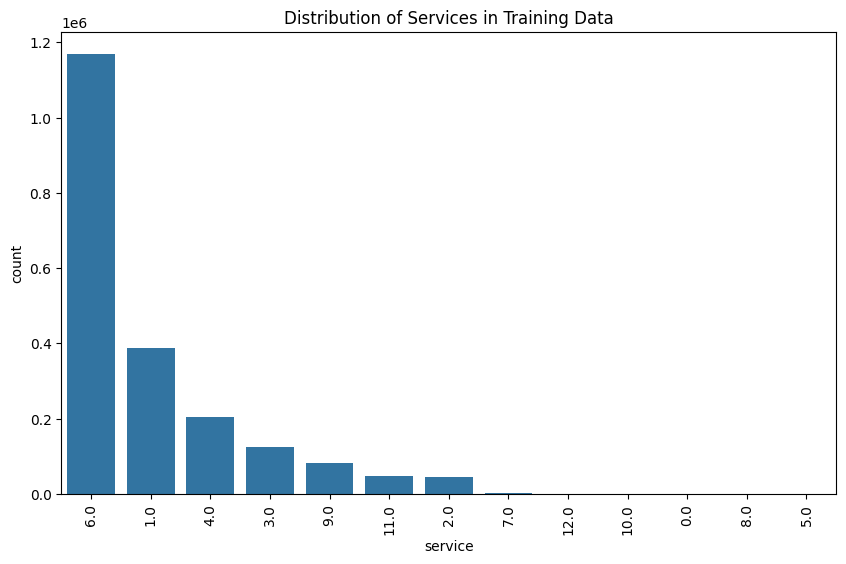

In [55]:
# Examine service distribution (if available)
if 'service' in train_df.columns: # Changed train_data to train_df
    print("\nService Distribution in Training Data:")
    print(train_df['service'].value_counts())# Changed train_data to train_df

    # Plot service distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x='service', order=train_df['service'].value_counts().index)# Changed train_data to train_df
    plt.xticks(rotation=90)
    plt.title('Distribution of Services in Training Data')
    plt.show()

Highly Correlated Features:
    Feature 1     Feature 2  Correlation
0       sloss        sbytes     0.959444
1       dloss        dbytes     0.991620
2       Dpkts        dbytes     0.971750
3       Dpkts         dloss     0.992239
4        dwin          swin     0.996474
5       Ltime         Stime     1.000000
6      synack        tcprtt     0.930215
7      ackdat        tcprtt     0.917777
8  ct_ftp_cmd  is_ftp_login     0.923981


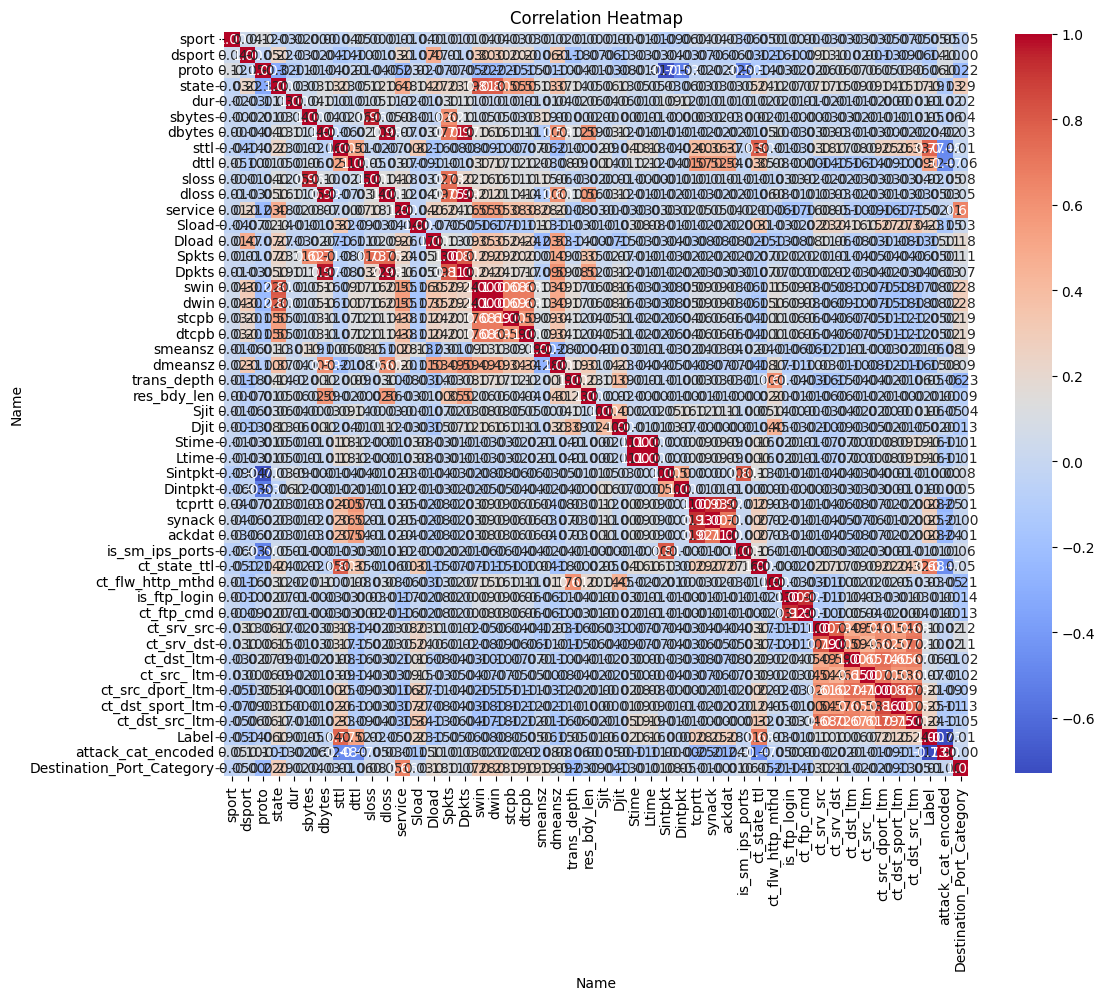

In [56]:
# Step 1: Select only numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
numeric_data = train_df[numeric_columns]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # Ensure the value is numeric before applying abs()
        value = pd.to_numeric(corr_matrix.iloc[i, j], errors='coerce')
        if not pd.isna(value) and abs(value) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

    Principal Component  Explained Variance  Cumulative Variance
0                     1        1.393628e-01             0.139363
1                     2        1.123156e-01             0.251678
2                     3        9.945740e-02             0.351136
3                     4        7.677109e-02             0.427907
4                     5        5.900625e-02             0.486913
5                     6        5.102601e-02             0.537939
6                     7        4.385064e-02             0.581790
7                     8        4.248013e-02             0.624270
8                     9        3.816785e-02             0.662438
9                    10        3.142407e-02             0.693862
10                   11        2.802242e-02             0.721884
11                   12        2.415808e-02             0.746042
12                   13        2.140705e-02             0.767449
13                   14        2.102827e-02             0.788478
14                   15  

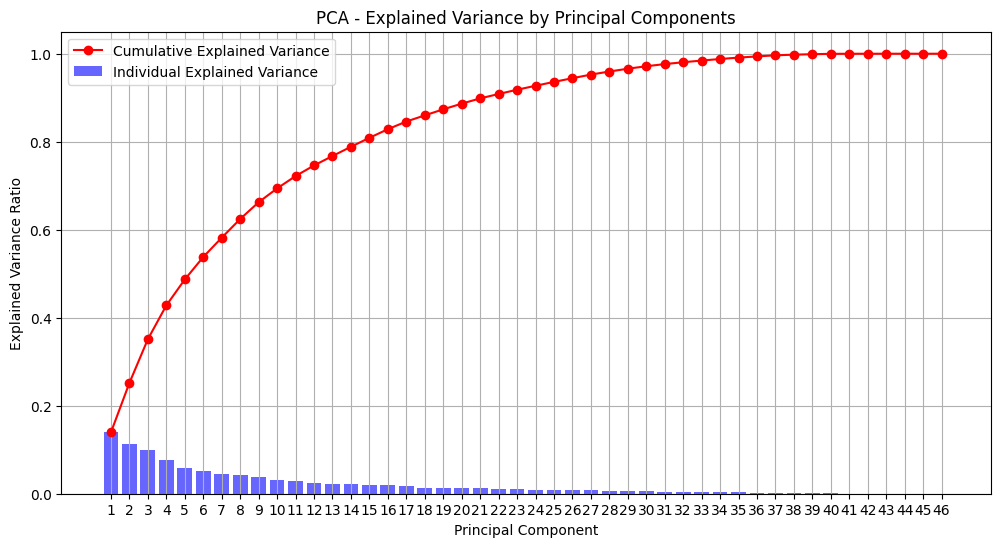

In [57]:
from sklearn.decomposition import PCA

# Step 1: Select only numeric columns
numeric_columns = train_df.drop(["ct_flw_http_mthd","is_ftp_login"],axis=1).select_dtypes(include=[np.number]).columns
numeric_data = train_df[numeric_columns]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'], marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

Correlation of Features with attack_cat_encoded (sorted):
Name
Label                        0.729577
sttl                         0.475003
dttl                         0.471470
ct_state_ttl                 0.465809
tcprtt                       0.245196
ackdat                       0.240706
synack                       0.213602
Sload                        0.146235
state                        0.126459
Ltime                        0.113313
Stime                        0.113313
ct_dst_src_ltm               0.110711
ct_dst_sport_ltm             0.109585
Dload                        0.106584
proto                        0.102866
dsport                       0.102554
ct_src_dport_ltm             0.089142
dmeansz                      0.083699
smeansz                      0.080480
sbytes                       0.063868
trans_depth                  0.061686
sport                        0.053073
Sjit                         0.052055
ct_flw_http_mthd             0.049646
sloss                    

C:\Users\arind\AppData\Local\Temp\ipykernel_16576\3996426392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


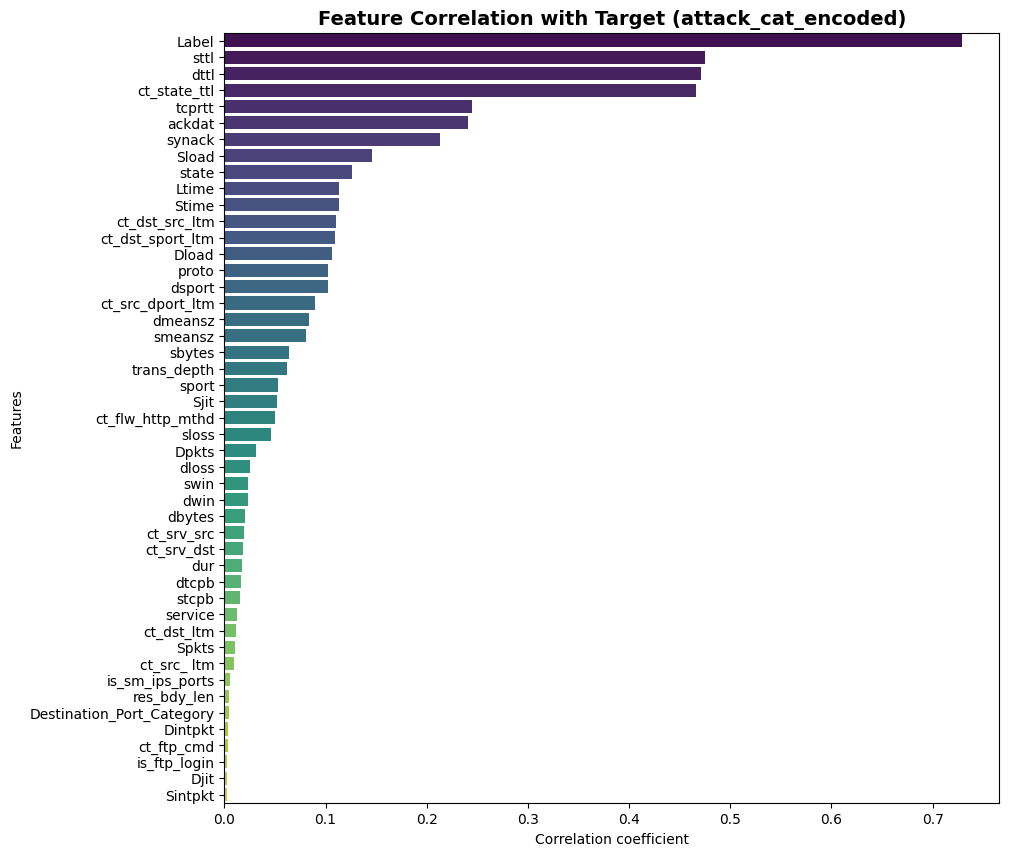

In [58]:
# Compute correlation with target column
correlations = train_df.corr(numeric_only=True)['attack_cat_encoded'].drop('attack_cat_encoded')

# Sort by absolute correlation (descending)
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Print correlation values in text
print("Correlation of Features with attack_cat_encoded (sorted):")
print(correlations_sorted)

# Plot correlation values
plt.figure(figsize=(10, 10))
sns.barplot(
    x=correlations_sorted.values, 
    y=correlations_sorted.index, 
    palette="viridis"
)
plt.title("Feature Correlation with Target (attack_cat_encoded)", fontsize=14, fontweight="bold")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

In [ ]:
from scipy.stats import skew

# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Save our encoding model for use in future to ensure the mapping sequence is unaltered 

In [60]:
joblib.dump(service_encoder, r"C:\Users\arind\OneDrive\Desktop\Network IDS\models\service_encoder.pkl")
joblib.dump(proto_encoder, r"C:\Users\arind\OneDrive\Desktop\Network IDS\models\proto_encoder.pkl")
joblib.dump(state_encoder, r"C:\Users\arind\OneDrive\Desktop\Network IDS\models\state_encoder.pkl")

['C:\\Users\\arind\\OneDrive\\Desktop\\Network IDS\\models\\state_encoder.pkl']

Save our cleaned and preprocessed training data

In [61]:
train_df.to_csv(r"C:\Users\arind\OneDrive\Desktop\Network IDS\data\processed\train_df_processed.csv", index=False)